<h2>Q2</h2>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Mall_Customers.csv")
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'}, inplace=True)
data = data.drop(['CustomerID'],axis=1)
data

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


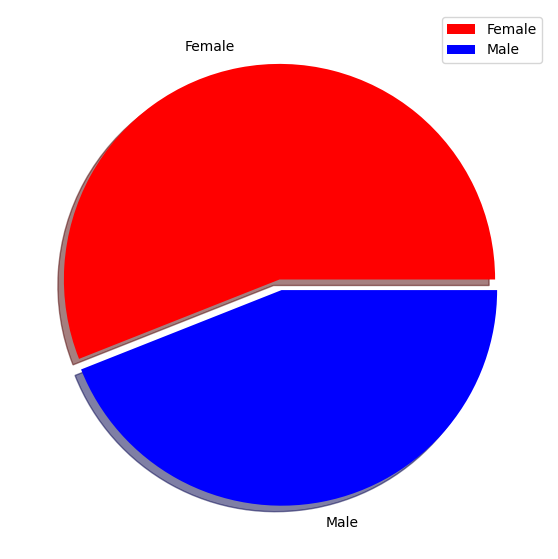

In [14]:
plt.figure(figsize=(7,7))
size = data['Gender'].value_counts()
label = ['Female','Male']
color = ['Red','Blue']
explode = [0,0.050]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()
#this will show which gender people visit the mall often

In [26]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

x = data.iloc[:,[2,3]].values
db = DBSCAN(eps=4, min_samples=4, metric='euclidean')
model = db.fit(x)
label = model.labels_
sample_cores = np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True
n_clusters = len(set(label)) - (1 if -1 in label else 0)
print('No of clusters:',n_clusters)
#This calculates no of clusters and prints it

No of clusters: 8


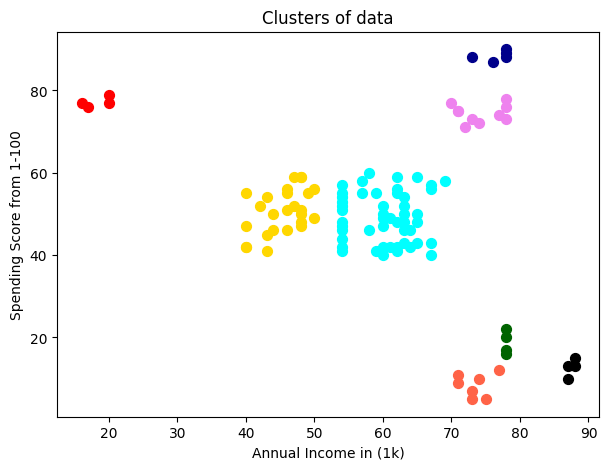

In [28]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'gold')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'violet')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'tomato')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'darkblue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'darkgreen')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()
